## Adaptation du tutoriel vers le texte

In [1]:
import numpy as np
from math import floor
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.utils import to_categorical

from pprint import pprint
import matplotlib.pyplot as plt
from random import randrange

from keras.utils import np_utils

from modules.loader import ComptaDataLoader

print('env: ', os.environ['CONDA_DEFAULT_ENV'])
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.
env:  deep-learning


## Creation d'un CSV

In [10]:
loader = ComptaDataLoader()
loader.create_csv(1)

Chargement des dossiers: ...OK
Sélection des fichiers: ... OK
Chargement des images: ... OK
Mise en forme des données: ... OK
Sauvegarde: ... OK


## Lecture des csv

In [11]:
path = r"../datas/CURATED/"

data = np.genfromtxt(path + '1500_data.csv', delimiter=',')
labels = np.genfromtxt(path + '1500_labels.csv', delimiter=',')

## Preprocessing

In [12]:
# Explication:
# 0     127.5   255   3 valeurs par defaut
# 0     .25     1     /255
# -.5   0       .5    -.5
data = (data / 255) - 0.5

data = np.apply_along_axis(lambda row: row.reshape(28,28), 1, data)
data = np.expand_dims(data, axis=3)

labels = to_categorical(labels)

# Mélange de manière synchronisé la data et les labels
randomize = np.arange(len(data))
np.random.shuffle(randomize)
data = data[randomize]
labels = labels[randomize]

print(
    data.shape, '\n',
    labels.shape, '\n',
    [np.argmax(row) for row in labels[:10]]
)

(38283, 28, 28, 1) 
 (38283, 26) 
 [3, 21, 23, 24, 2, 25, 18, 3, 17, 3]


## Je plot gentiment une lettre:

C'est un D


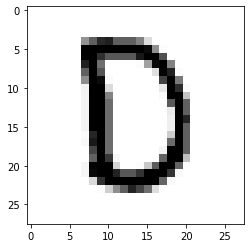

In [13]:
# train_images = np.apply_along_axis(
#   , 
#   1, 
#   train_images
#)
# train_images = np.expand_dims(train_images, axis=3)

nb_random = randrange(0, len(data))

img = data[nb_random]
plt.imshow(img, cmap='Greys')
print( "C'est un " + loader.int_to_letter(np.argmax(labels[nb_random])))

del(img, nb_random)

## Construction du modèle

In [14]:
num_filters = 8
filter_size = 3
pool_size = 2

model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(26, activation='softmax'),
])

optimizer = 'adam'

model.compile(
  optimizer,
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

## Entrainement du modèle

In [15]:
nb_epoch = 12

print(
  'num_filters:\t', num_filters,
  '\nfilter_size:\t', filter_size,
  '\npool_size:\t', pool_size,
  '\noptimizer:\t', optimizer,
  '\nnb_epoch:\t', nb_epoch,
)

history = model.fit(
  data,
  labels,
  epochs=nb_epoch,
  validation_split=0.25,
)

# pprint(
#   history.history
# )

model.save(str(int(len(data)/26)) + '_CNN.h5')

num_filters:	 8 
filter_size:	 3 
pool_size:	 2 
optimizer:	 adam 
nb_epoch:	 12
Train on 28712 samples, validate on 9571 samples
Epoch 1/12
28712/28712 [==============================] - 6s 205us/step - loss: 0.8809 - accuracy: 0.7600 - val_loss: 0.6038 - val_accuracy: 0.8328
Epoch 2/12
28712/28712 [==============================] - 5s 172us/step - loss: 0.5466 - accuracy: 0.8520 - val_loss: 0.5263 - val_accuracy: 0.8531
Epoch 3/12
28712/28712 [==============================] - 5s 172us/step - loss: 0.4537 - accuracy: 0.8773 - val_loss: 0.4386 - val_accuracy: 0.8793
Epoch 4/12
28712/28712 [==============================] - 5s 172us/step - loss: 0.3733 - accuracy: 0.8996 - val_loss: 0.3773 - val_accuracy: 0.8982
Epoch 5/12
28712/28712 [==============================] - 5s 177us/step - loss: 0.3085 - accuracy: 0.9181 - val_loss: 0.3235 - val_accuracy: 0.9111
Epoch 6/12
28712/28712 [==============================] - 5s 182us/step - loss: 0.2619 - accuracy: 0.9296 - val_loss: 0.2994 - val

In [36]:
def transform_to_letter(index: int):
    alphabet = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
    return alphabet[index]

# from keras.models import load_model
# model = load_model('1000_CNN.h5')

nb_element = 29
nb_random = randrange(0, len(data)-nb_element)


prediction = [ transform_to_letter(lettre) for lettre in np.argmax(model.predict(data[nb_random:nb_random+nb_element]) , axis=1)]
verite = [ transform_to_letter(np.argmax(lettre))  for lettre in labels[nb_random:nb_random+nb_element] ] 

print(
    'Prediciton:\t', prediction,
    '\nVérité:\t\t', verite,
    '\nLe modèle donne un resultat juste ? ', prediction == verite
)

Prediciton:	 ['D', 'J', 'V', 'H', 'G', 'B', 'V', 'R', 'J', 'Y', 'S', 'Y', 'P', 'T', 'J', 'P', 'S', 'Q', 'P', 'M', 'Y', 'Y', 'U', 'Z', 'F', 'K', 'M', 'A', 'A'] 
Vérité:		 ['D', 'J', 'V', 'H', 'G', 'B', 'V', 'R', 'J', 'Y', 'S', 'Y', 'P', 'T', 'J', 'P', 'S', 'Q', 'P', 'M', 'Y', 'Y', 'U', 'Z', 'F', 'K', 'M', 'A', 'A'] 
Le modèle donne un resultat juste ?  True


# Les hyperparamètres à tester:

## Network Depth
What happens if we add or remove Convolutional layers? How does that affect training and/or the model’s final performance?
```
model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),

  Conv2D(num_filters, filter_size),
  
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])
```

## Dropout
What if we tried adding Dropout layers, which are commonly used to prevent overfitting (surentrainement) ?
```
from tensorflow.keras.layers import Dropout

model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  
  Dropout(0.5),

  Flatten(),
  Dense(10, activation='softmax'),
])
```

## Fully-connected Layers
What if we add fully-connected layers between the Convolutional outputs and the final Softmax layer? This is something commonly done in CNNs used for Computer Vision.

```
model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),

  Dense(64, activation='relu'),
  
  Dense(10, activation='softmax'),
])
```

## Convolution Parameters

What if we play with the Conv2D parameters? For example:

```
Conv2D(
    num_filters,
    filter_size,
    input_shape=(28, 28, 1),

    strides=2,
    padding='same',
    activation='relu',
    
  ),
```

code complet du tutoriel :

``` python
# The full CNN code!
####################
import numpy as np
import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical

train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Reshape the images.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

num_filters = 8
filter_size = 3
pool_size = 2

# Build the model.
model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=3,
  validation_data=(test_images, to_categorical(test_labels)),
)

# Save the model to disk.
model.save_weights('cnn.h5')

# Load the model from disk later using:
# model.load_weights('cnn.h5')

# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]
```